In [1]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [2]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [3]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [4]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [5]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [6]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [7]:
store.close()
store_repeat.close()

In [8]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [9]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line'")['biosample_term_name'].unique()

array(['T47D', 'Daoy', 'HL-60', 'A549', 'RPMI8226', 'K562', 'HeLa-S3',
       'Jurkat', 'Caki2', 'KBM-7', 'Karpas-422', 'GM06990', 'NCI-H226',
       'GM12878', 'HCT116', 'MG63', 'HS-27A', 'HS-5', 'BE2C', 'WI38',
       'HepG2', 'M059J', 'WERI-Rb-1', 'MCF-7', 'LHCN-M2',
       'LNCaP clone FGC', 'PC-9', 'RCC 7860', 'DND-41', 'MM.1S', 'GM12864',
       'CMK', 'GM12865', 'OCI-LY7', 'HT-29', 'Panc1', 'A673', 'SK-N-SH',
       'G401', 'ACHN', 'Loucy', 'SK-N-MC', 'NAMALWA', 'SJSA1', 'NT2/D1',
       'RPMI-7951', 'PC-3', 'NB4', 'Caco-2', 'A172'], dtype=object)

In [10]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'K562' & method=='H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
170,ENCSR903CEC,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for K562,[],3,"August, 2016",[],/organisms/human/,[],ENCFF250DSF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
204,ENCSR219XCK,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for L...,[],3,"August, 2016",[],/organisms/human/,[],ENCFF371JNQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac


In [11]:
encode_bed = BedTool("../download/ENCODE/ENCSR903CEC/files/ENCFF250DSF/ENCFF250DSF.bed.gz")

In [13]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_Alu_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [14]:
encode_bed.head()

chr7	106206757	106212313	Distal-Prediction-1	1	.	106207512	106212313	255,205,0
 chr2	33141168	33141802	Distal-Prediction-2	1	.	33141168	33141802	255,205,0
 chr19	52047589	52056214	Distal-Prediction-3	1	.	52048957	52053741	255,205,0
 chr6	159273426	159276316	Distal-Prediction-4	1	.	159273426	159276316	255,205,0
 chr10	74078831	74083775	Distal-Prediction-5	1	.	74079445	74083775	255,205,0
 chr18	3620903	3627615	Distal-Prediction-6	1	.	3620903	3626780	255,205,0
 chr1	26447785	26455587	Distal-Prediction-7	1	.	26450850	26455587	255,205,0
 chr11	75244071	75250880	Distal-Prediction-8	1	.	75244560	75246987	255,205,0
 chr1	26945615	26949271	Distal-Prediction-9	1	.	26947061	26948770	255,205,0
 chr1	145454000	145457861	Distal-Prediction-10	1	.	145454000	145457861	255,205,0
 

In [15]:
encode_bed.count()

33082

In [16]:
repeat_bed.count()

1177252

In [17]:
encode_bed_df = encode_bed.to_dataframe()

## Alu-enhancers: core of enhancers in Alus

In [18]:
def compute_centers(df):
    df['centered_locus'] = round(
        (df['end'] - df['start'])/2 
        + df['start']).astype(int)

In [19]:
compute_centers(encode_bed_df)

In [20]:
encode_bed_cores_df = encode_bed_df.copy()
encode_bed_cores_df['start'] = encode_bed_cores_df['centered_locus']
encode_bed_cores_df['end'] = encode_bed_cores_df['centered_locus']

In [21]:
encode_bed_cores = BedTool().from_dataframe(encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [22]:
encode_bed_cores.count()

33082

In [23]:
#MIR-enhancers: core of enhancer in MIR
core_intersection = encode_bed_cores.intersect(repeat_bed)

In [24]:
core_intersection.count()

1459

In [25]:
core_intersection.head()

chr19	2059126	2059126	Distal-Prediction-12	1	.
 chr1	31240658	31240658	Distal-Prediction-16	1	.
 chr1	15103594	15103594	Distal-Prediction-23	1	.
 chr7	64460924	64460924	Distal-Prediction-45	1	.
 chr7	106649151	106649151	Distal-Prediction-50	1	.
 chr3	138595524	138595524	Distal-Prediction-57	1	.
 chr18	9009373	9009373	Distal-Prediction-62	1	.
 chr2	55367488	55367488	Distal-Prediction-65	1	.
 chr16	23915732	23915732	Distal-Prediction-71	1	.
 chr6	37017636	37017636	Distal-Prediction-73	1	.
 

In [26]:
# null model MIR-enhancers
shuffled_encode_bed_cores = encode_bed_cores.shuffle(g=assembly_path)
core_null_model_intersection = shuffled_encode_bed_cores.intersect(repeat_bed)

In [142]:
core_null_model_intersection.count()

3255

In [143]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num,
                                  g=assembly)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed_overlap_with.shuffle(g=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

In [144]:
from joblib import Parallel, delayed
import multiprocessing

def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, 
                                                    samples_num,strategy='random'):
    num_cores = multiprocessing.cpu_count()

    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']

    if strategy == 'shuffle':
        df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                             (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    return pd.concat(df_list)

In [145]:
test_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 100)

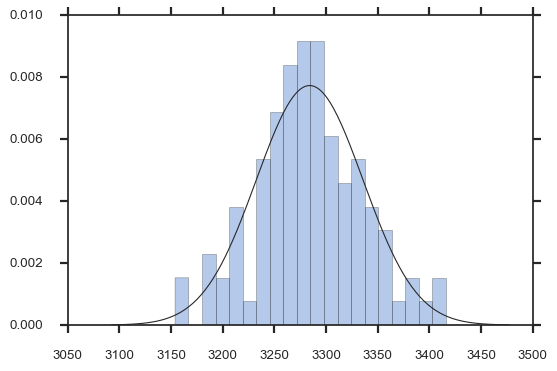

In [146]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df[['size']], kde=False, fit=st.norm, bins=20)

In [147]:
z_score =(core_intersection.count() - np.mean(test_df['size']))/np.std(test_df['size'])
print(z_score)

-35.35711242499014


In [33]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

2.5173891590336763e-226

In [34]:
p_values = st.norm.sf(abs(z_score))
p_values

2.5173891590336763e-226

In [35]:
st.ttest_1samp(a= test_df[['size']], popmean= core_intersection.count())

Ttest_1sampResult(statistic=array([ 319.3498554]), pvalue=array([  5.54511285e-151]))

In [36]:
st.ttest_1samp(a= test_df[['size']], popmean= np.mean(test_df[['size']]))

Ttest_1sampResult(statistic=size    0.0
dtype: float64, pvalue=array([ 1.]))

In [37]:
chi2, p = st.chisquare( test_df[['size']],core_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 224397.24674435]
p-value: [ 0.]


In [38]:
encode_bed_cores.sort().fisher(repeat_bed.sort(), f=1e-09, g=assembly_path)

<FisherOutput at 4717074024>
# Number of query intervals: 33082
# Number of db intervals: 1167466
# Number of overlaps: 1459
# Number of possible intervals (estimated): 11758874
# phyper(1459 - 1, 33082, 11758874 - 33082, 1167466, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 1459         | 31623        |
# not in -a | 1166007      | 10559785     |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1.3666e-305	1	2.4792e-305	0.418

In [39]:
1-st.hypergeom.cdf(975, 21123880 - 33082, 33082, 593161)

0.067519672328844149

In [40]:
df_reldist = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,227.000,211.000,239.000,296.000,309.000,372.000,367.000,410.000,422.000,479.000,...,930.000,857.000,945.000,919.000,930.000,877.000,958.000,932.000,944.000,11.0
fraction,0.007,0.006,0.007,0.009,0.009,0.011,0.011,0.012,0.013,0.014,...,0.028,0.026,0.029,0.028,0.028,0.027,0.029,0.028,0.029,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490,0.5
total,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,...,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.0


In [41]:
df_reldist_random = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.shuffle(g=assembly_path, chrom=False).sort()))

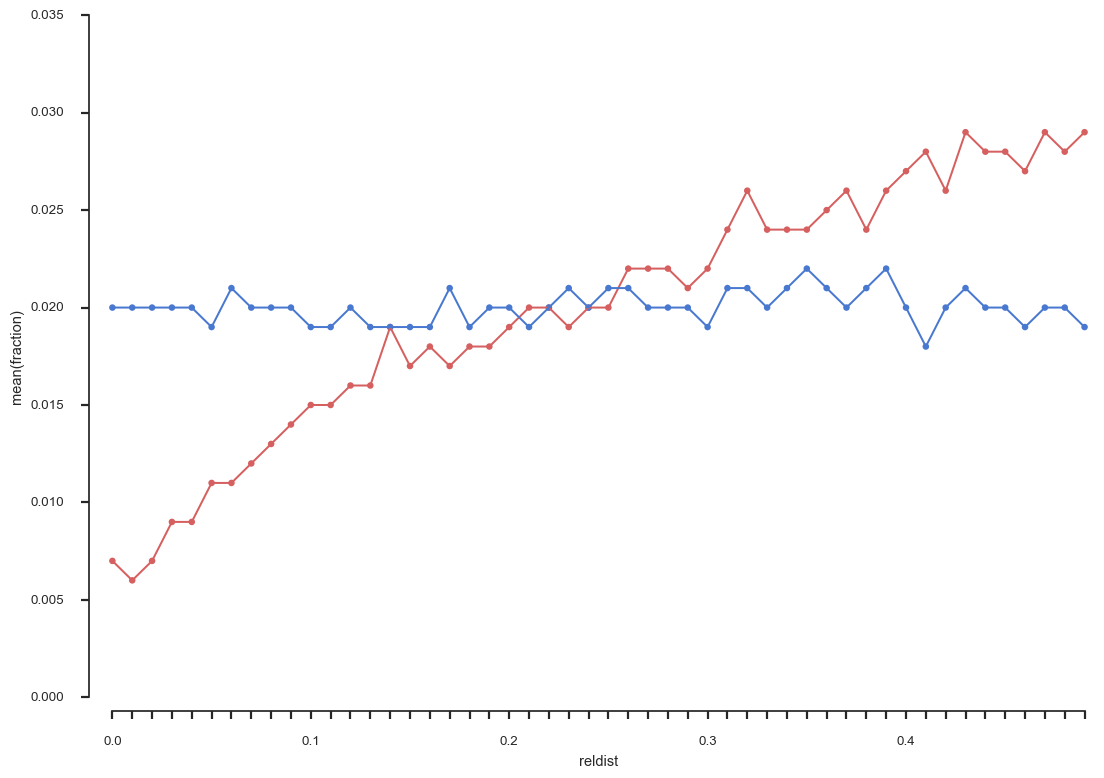

In [42]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Enhancer-Alus: Alus in a +/- 4 kbp window around enhancer's core 

In [43]:
encode_bed_df = encode_bed.to_dataframe()
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [44]:
encode_bed_df['size'].quantile(0.5) == encode_bed_df['size'].median()

True

In [45]:
encode_bed_df['size'].std()

1457.432952511683

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


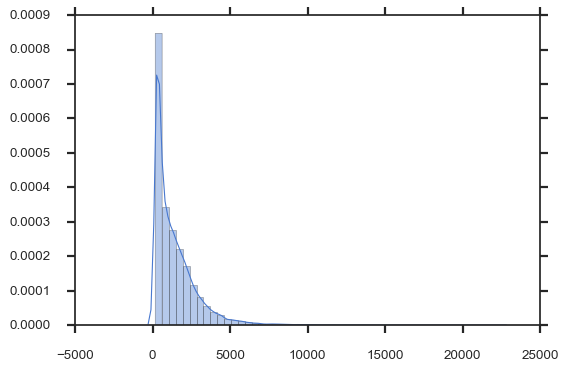

In [46]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(encode_bed_df[['size']], kde=True)

In [47]:
np.percentile(encode_bed_df[['size']], 50)

971.0

In [48]:
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [49]:
encode_bed_df[['size']].quantile(np.arange(0,1,0.1))

,size
0.0,170.0
0.1,251.0
0.2,337.0
0.3,459.0
0.4,675.0
0.5,971.0
0.6,1313.0
0.7,1721.0
0.8,2229.0
0.9,3123.0


In [50]:
# what if using percentiles in considering enhancer regions? Eg: b=170/2, 251/2, ..., 3123/2
#encode_bed_slop = encode_bed_cores.slop(genome='hg19', b=int(round(3123/2)))

In [51]:
#compute "enhancers regions" as +/- 4kb from enhancer cores
encode_bed_slop = encode_bed_cores.slop(g=assembly_path, b=4000)

In [52]:
encode_bed_cores.sort().head()

chr1	118595	118595	Distal-Prediction-10810	1	.
 chr1	138794	138794	Proximal-Prediction-8451	1	.
 chr1	229554	229554	Proximal-Prediction-13463	1	.
 chr1	235802	235802	Proximal-Prediction-6494	1	.
 chr1	713934	713934	Proximal-Prediction-2259	1	.
 chr1	761154	761154	Proximal-Prediction-9261	1	.
 chr1	762601	762601	Proximal-Prediction-1564	1	.
 chr1	765589	765589	Proximal-Prediction-15111	1	.
 chr1	840032	840032	Proximal-Prediction-13579	1	.
 chr1	894288	894288	Proximal-Prediction-8969	1	.
 

In [53]:
encode_bed_slop.sort().head()

chr1	114595	122595	Distal-Prediction-10810	1	.
 chr1	134794	142794	Proximal-Prediction-8451	1	.
 chr1	225554	233554	Proximal-Prediction-13463	1	.
 chr1	231802	239802	Proximal-Prediction-6494	1	.
 chr1	709934	717934	Proximal-Prediction-2259	1	.
 chr1	757154	765154	Proximal-Prediction-9261	1	.
 chr1	758601	766601	Proximal-Prediction-1564	1	.
 chr1	761589	769589	Proximal-Prediction-15111	1	.
 chr1	836032	844032	Proximal-Prediction-13579	1	.
 chr1	890288	898288	Proximal-Prediction-8969	1	.
 

In [54]:
encode_bed_slop.count()

33082

In [55]:
#enhancer-MIRs: MIR in +/- 4kb from the core of an enhancer 
#(asking the full MIR to be overlapped by an enhancer region)
region_intersection = repeat_bed.intersect(encode_bed_slop, f=1)

In [56]:
region_intersection.count()

167392

In [57]:
# null model enhancers-MIRs
shuffled_repeat = repeat_bed.shuffle(g=assembly_path)

In [58]:
shuffled_repeat.count() == repeat_bed.count()

True

In [59]:
null_model_intersection = shuffled_repeat.intersect(encode_bed_slop, f=1)

In [60]:
null_model_intersection.count()

97403

In [61]:
test_df2 = create_random_overlap_distribution_parallelized(repeat_bed, encode_bed_slop, assembly_path,
                                                         1, 100)


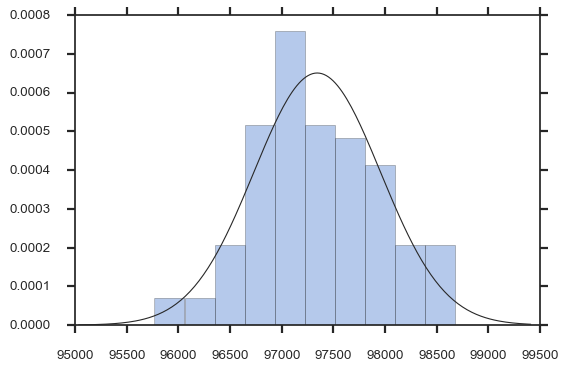

In [62]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df2[['size']], kde=False, fit=st.norm, bins=10)

In [63]:
z_score =(region_intersection.count() - np.mean(test_df2['size']))/np.std(test_df2['size'])
print(z_score)

114.23942087987345


In [64]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

1.0

In [65]:
p_values = st.norm.sf(abs(z_score))
p_values

0.0

In [66]:
st.ttest_1samp(a= test_df2[['size']], popmean= region_intersection.count())

Ttest_1sampResult(statistic=array([-1136.66788598]), pvalue=array([  1.50526033e-205]))

In [67]:
chi2, p = st.chisquare( test_df2[['size']],region_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 2931623.27794638]
p-value: [ 0.]


In [68]:
repeat_bed.sort().fisher(encode_bed_slop.sort(), f=1, g=assembly_path)

<FisherOutput at 4697866816>
# Number of query intervals: 1177252
# Number of db intervals: 33082
# Number of overlaps: 167392
# Number of possible intervals (estimated): 1177252
# phyper(167392 - 1, 1177252, 1177252 - 1177252, 33082, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 167392       | 1009860      |
# not in -a | 0            | 0            |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	1	1	nan

In [69]:
#pvalue <- 1-phyper(45, 92, 7518, 1329)
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
1-st.hypergeom.cdf(66741, 0, 594732, 33082)

0.0

In [70]:
df_reldist = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,227.000,211.000,239.000,296.000,309.000,372.000,367.000,410.000,422.000,479.000,...,930.000,857.000,945.000,919.000,930.000,877.000,958.000,932.000,944.000,11.0
fraction,0.007,0.006,0.007,0.009,0.009,0.011,0.011,0.012,0.013,0.014,...,0.028,0.026,0.029,0.028,0.028,0.027,0.029,0.028,0.029,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090,...,0.410,0.420,0.430,0.440,0.450,0.460,0.470,0.480,0.490,0.5
total,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,...,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.000,33077.0


In [71]:
df_reldist_random = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort().shuffle(g=assembly_path, chrom=False).sort()))

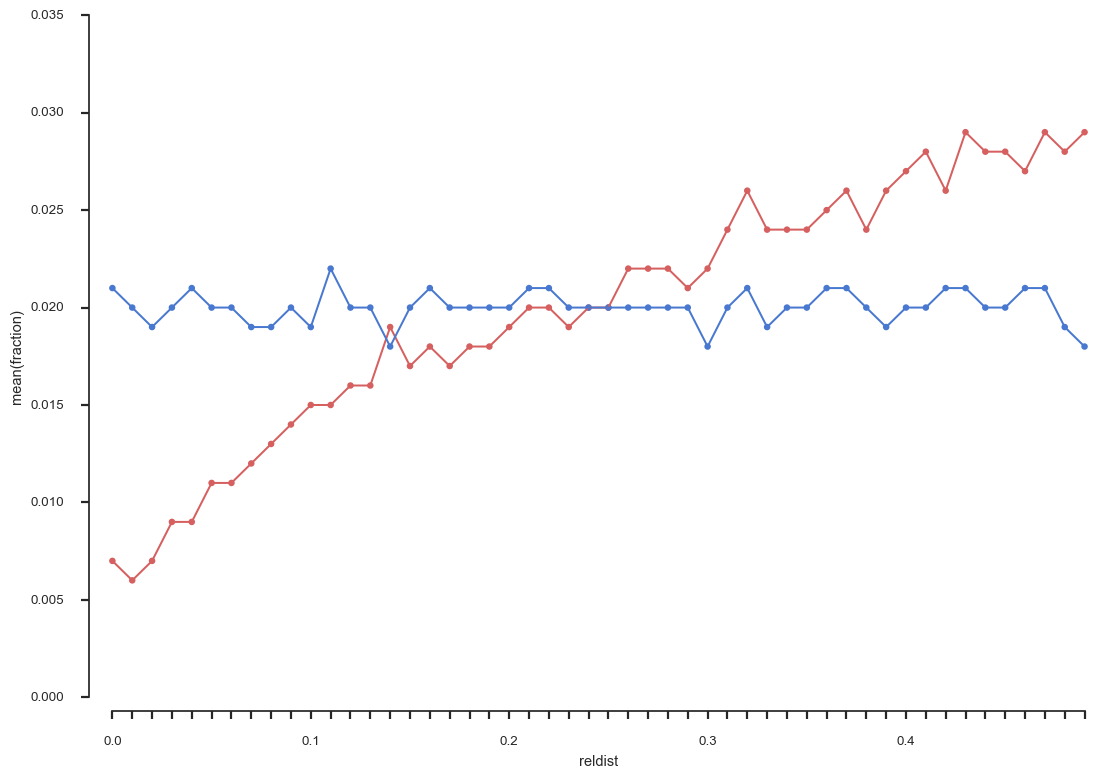

In [72]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Densities

In [73]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [108]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/Alu')

K562 enhancers density = 1.068651399908848e-05 (num of intervals)/(genome bp)
Sine/Alu length = 305103183 bp
Expected number of Sine/Alu K562 enhancers = 3260


In [109]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [110]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [111]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [112]:
len(distal_df)

17249

In [113]:
len(proximal_df)

15833

In [114]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

Distal enhancers density = 5.571963000129291e-06 (num of intervals)/(genome bp)
Sine/MIR length = 305103183 bp
Expected number of Sine/MIR Distal enhancers = 1700


In [115]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

Proximal enhancers density = 5.11455099895919e-06 (num of intervals)/(genome bp)
Sine/MIR length = 305103183 bp
Expected number of Sine/MIR Proximal enhancers = 1560


In [116]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [117]:
genes_bed.count()

82960

In [118]:
genes_bed_df = genes_bed.to_dataframe()

In [119]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [120]:
genes_bed_df['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chrX', 'chrY', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21',
       'chr22'], dtype=object)

In [121]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [122]:
genes_bed.count()

78807

In [123]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/Alu')

Genes density = 2.5457109870206334e-05 (num of intervals)/(genome bp)
Sine/Alu length = 305103183 bp
Expected number of Sine/Alu Genes = 7767


In [124]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [125]:
genic_enhancers_bed.count()

15722

In [126]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [127]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

0

In [128]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [129]:
non_genic_enhancers_bed.count()

17360

In [130]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

True

In [131]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [132]:
enhancers_regions_bed.count()

33082

In [133]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [134]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

,size
0.0,19.0
0.1,993.6
0.2,4083.0
0.3,8054.0
0.4,13047.0
0.5,20134.0
0.6,30029.2
0.7,44468.0
0.8,71447.4
0.9,133227.0


In [135]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [136]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [137]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [138]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [139]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [140]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [141]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of Alu in genic enhancers", d1)
print("density of Alu in genic non enhancers", d2)
print("density of Alu in non genic enhancers", d3)
print("density of Alu in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)


density of Alu in genic enhancers 0.09689703467424013
density of Alu in genic non enhancers 0.03751555595567507
density of Alu in non genic enhancers 0.09636644655410137
density of Alu in enhancer regions 0.09724669004292365
Normalized Ratios 0.29539461887147406 0.11436772436364552 0.29377709903659943 0.29646055772828095


## Closeness Profile

In [148]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [176]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line' & method=='H3K27ac'")['biosample_term_name'].unique()

array(['K562', 'GM12878', 'DND-41', 'HCT116', 'OCI-LY7', 'A549', 'HeLa-S3',
       'Loucy', 'MCF-7', 'Panc1', 'HepG2'], dtype=object)

In [188]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='tissue' & method=='H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
41,ENCSR821QGA,hg19,UBERON:0000305,amnion,tissue,Enhancer-like regions using H3K27ac-only for P...,[mesoderm],3,"August, 2016",[extraembryonic structure],/organisms/human/,[],ENCFF003LVR.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
84,ENCSR139TZA,hg19,UBERON:0001134,skeletal muscle tissue,tissue,Enhancer-like regions using H3K27ac-only for S...,[mesoderm],3,"August, 2016",[muscle organ],/organisms/human/,[musculature of body],ENCFF144PJO.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
90,ENCSR553GUQ,hg19,UBERON:0012488,muscle layer of duodenum,tissue,Enhancer-like regions using H3K27ac-only for D...,[],3,"August, 2016",[small intestine],/organisms/human/,[digestive system],ENCFF536RAQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
179,ENCSR905DEO,hg19,UBERON:0002084,heart left ventricle,tissue,Enhancer-like regions using H3K27ac-only for L...,[mesoderm],3,"August, 2016",[heart],/organisms/human/,[circulatory system],ENCFF524SKZ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
190,ENCSR516DXQ,hg19,UBERON:0000945,stomach,tissue,Enhancer-like regions using H3K27ac-only for G...,[],3,"August, 2016",[stomach],/organisms/human/,[digestive system],ENCFF183FMS.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
203,ENCSR838TJD,hg19,UBERON:0002370,thymus,tissue,Enhancer-like regions using H3K27ac-only for F...,"[mesoderm,endoderm]",3,"August, 2016",[thymus],/organisms/human/,"[endocrine system,immune system]",ENCFF416LJP.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
205,ENCSR563QZW,hg19,UBERON:0002305,layer of hippocampus,tissue,Enhancer-like regions using H3K27ac-only for B...,[ectoderm],3,"August, 2016",[brain],/organisms/human/,[central nervous system],ENCFF357FRW.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
207,ENCSR472VRB,hg19,UBERON:0006483,middle frontal area 46,tissue,Enhancer-like regions using H3K27ac-only for B...,[ectoderm],3,"August, 2016",[brain],/organisms/human/,[central nervous system],ENCFF021ERU.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
217,ENCSR323VIW,hg19,UBERON:0001774,muscle of trunk,tissue,Enhancer-like regions using H3K27ac-only for F...,[],3,"August, 2016",[muscle organ],/organisms/human/,[musculature of body],ENCFF663YMC.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
228,ENCSR928FIJ,hg19,UBERON:0002967,cingulate gyrus,tissue,Enhancer-like regions using H3K27ac-only for B...,[ectoderm],3,"August, 2016",[brain],/organisms/human/,[central nervous system],ENCFF518VHQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac


In [189]:
encode_bed = BedTool("../download/ENCODE/ENCSR821QGA/files/ENCFF003LVR/ENCFF003LVR.bed.gz")

In [190]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [191]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

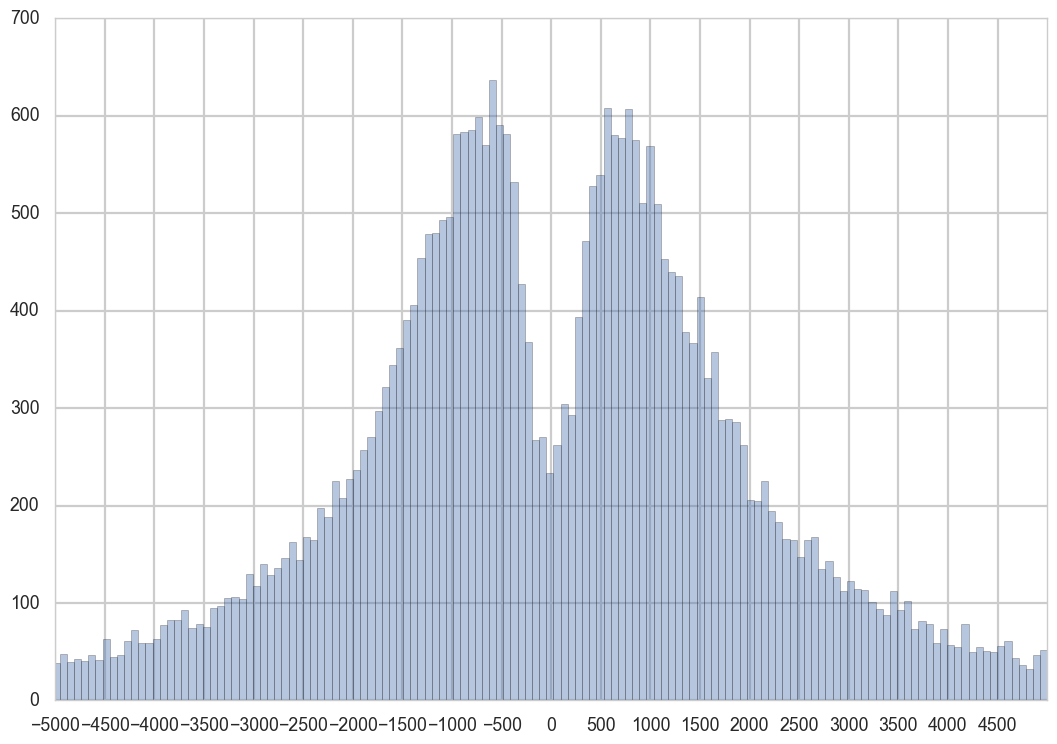

In [192]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-5000, 5000)
g1.set_xticks(np.arange(-5000, 5000, 500))

In [193]:
repeat_MIR_bed = BedTool().from_dataframe(pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_MIR_bed"))

In [194]:
repeat_MIR_closeness_df = build_closeness_df(encode_bed, repeat_MIR_bed)

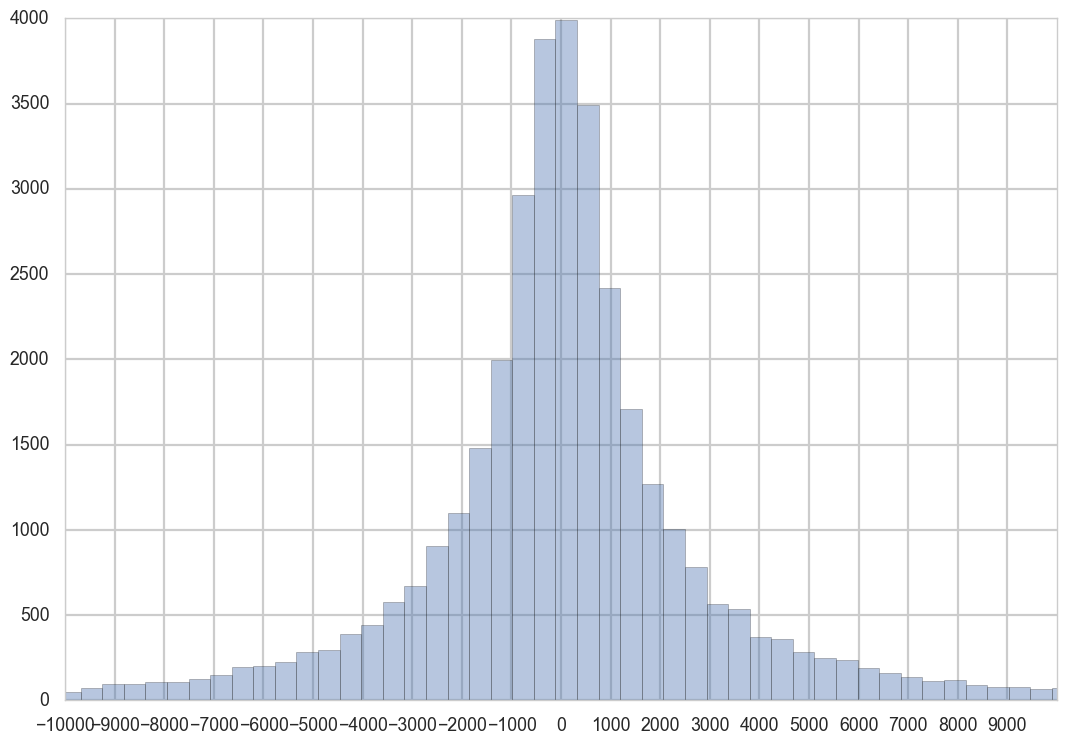

In [195]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_MIR_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-10000, 10000)
g1.set_xticks(np.arange(-10000, 10000, 1000))